In [121]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/e-commerce/E-commerce_data.xlsx


# 1. Data Importing:

In [122]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [123]:
file_path = '/kaggle/input/e-commerce/E-commerce_data.xlsx'

# List the sheet names or indices you want to read
sheet_names = [0, 1, 2, 3, 4, 5]  # You can also use sheet names instead of indices

# Read the specified sheets into a dictionary of DataFrames
sheets_dict = pd.read_excel(file_path, sheet_name=sheet_names)

# Concatenate all sheets into one DataFrame
combined_df = pd.concat(sheets_dict.values(), ignore_index=True)


In [124]:
combined_df.head()

,customer_id,join_date,city_id,gender_id,gender_name,city_name,transaction_id,transaction_date,transaction_status,coupon_name,burn_date,branch_id,merchant_id,merchant_name
0,1.0,2022-01-08,7.0,1.0,NaN,NaN,NaN,NaT,NaN,NaN,NaT,NaN,NaN,NaN
1,2.0,2023-05-02,20.0,2.0,NaN,NaN,NaN,NaT,NaN,NaN,NaT,NaN,NaN,NaN
2,3.0,2023-05-14,15.0,1.0,NaN,NaN,NaN,NaT,NaN,NaN,NaT,NaN,NaN,NaN
3,4.0,2022-11-25,11.0,2.0,NaN,NaN,NaN,NaT,NaN,NaN,NaT,NaN,NaN,NaN
4,5.0,2023-04-26,8.0,1.0,NaN,NaN,NaN,NaT,NaN,NaN,NaT,NaN,NaN,NaN


In [125]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6052 entries, 0 to 6051
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   customer_id         6000 non-null   float64       
 1   join_date           1000 non-null   datetime64[ns]
 2   city_id             1020 non-null   float64       
 3   gender_id           1002 non-null   float64       
 4   gender_name         2 non-null      object        
 5   city_name           20 non-null     object        
 6   transaction_id      5000 non-null   float64       
 7   transaction_date    5000 non-null   datetime64[ns]
 8   transaction_status  5000 non-null   object        
 9   coupon_name         5000 non-null   object        
 10  burn_date           2516 non-null   datetime64[ns]
 11  branch_id           5010 non-null   float64       
 12  merchant_id         30 non-null     float64       
 13  merchant_name       20 non-null     object      

In [126]:
customers_df = pd.read_excel( '/kaggle/input/e-commerce/E-commerce_data.xlsx', sheet_name=0)

genders_df = pd.read_excel( '/kaggle/input/e-commerce/E-commerce_data.xlsx', sheet_name=1)

cities_df = pd.read_excel( '/kaggle/input/e-commerce/E-commerce_data.xlsx', sheet_name=2)

transactions_df = pd.read_excel( '/kaggle/input/e-commerce/E-commerce_data.xlsx', sheet_name=3)

branches_df = pd.read_excel( '/kaggle/input/e-commerce/E-commerce_data.xlsx', sheet_name=4)

merchants_df = pd.read_excel( '/kaggle/input/e-commerce/E-commerce_data.xlsx', sheet_name=5)


In [127]:
# 1. Merge customers with genders and cities
merged_df = customers_df.merge(genders_df, on='gender_id', how='left') \
                        .merge(cities_df, on='city_id', how='left')

# 2. Merge the result with transactions
merged_df = merged_df.merge(transactions_df, on='customer_id', how='left')

# 3. Merge the result with branches and merchants
merged_df = merged_df.merge(branches_df, on='branch_id', how='left') \
                     .merge(merchants_df, on='merchant_id', how='left')



In [128]:
merged_df.head()

,customer_id,join_date,city_id,gender_id,gender_name,city_name,transaction_id,transaction_date,transaction_status,coupon_name,burn_date,branch_id,merchant_id,merchant_name
0,1,2022-01-08,7,1,Male,Mansoura,178.0,2022-07-30,subscribed,SrP-866,NaT,8.0,20.0,Griffin-Leblanc
1,1,2022-01-08,7,1,Male,Mansoura,257.0,2022-09-19,burned,krI-075,2022-11-05,1.0,11.0,"Smith, Lawson and Hernandez"
2,1,2022-01-08,7,1,Male,Mansoura,1652.0,2022-06-09,burned,quk-137,2022-07-19,6.0,15.0,Butler-Gomez
3,1,2022-01-08,7,1,Male,Mansoura,1929.0,2022-07-30,burned,QiG-754,2022-10-18,8.0,20.0,Griffin-Leblanc
4,1,2022-01-08,7,1,Male,Mansoura,2352.0,2023-03-24,subscribed,OtC-985,NaT,4.0,15.0,Butler-Gomez


In [129]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5011 entries, 0 to 5010
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   customer_id         5011 non-null   int64         
 1   join_date           5011 non-null   datetime64[ns]
 2   city_id             5011 non-null   int64         
 3   gender_id           5011 non-null   int64         
 4   gender_name         5011 non-null   object        
 5   city_name           5011 non-null   object        
 6   transaction_id      5000 non-null   float64       
 7   transaction_date    5000 non-null   datetime64[ns]
 8   transaction_status  5000 non-null   object        
 9   coupon_name         5000 non-null   object        
 10  burn_date           2516 non-null   datetime64[ns]
 11  branch_id           5000 non-null   float64       
 12  merchant_id         5000 non-null   float64       
 13  merchant_name       5000 non-null   object      

# 2. Exploratory Data Analysis (EDA):

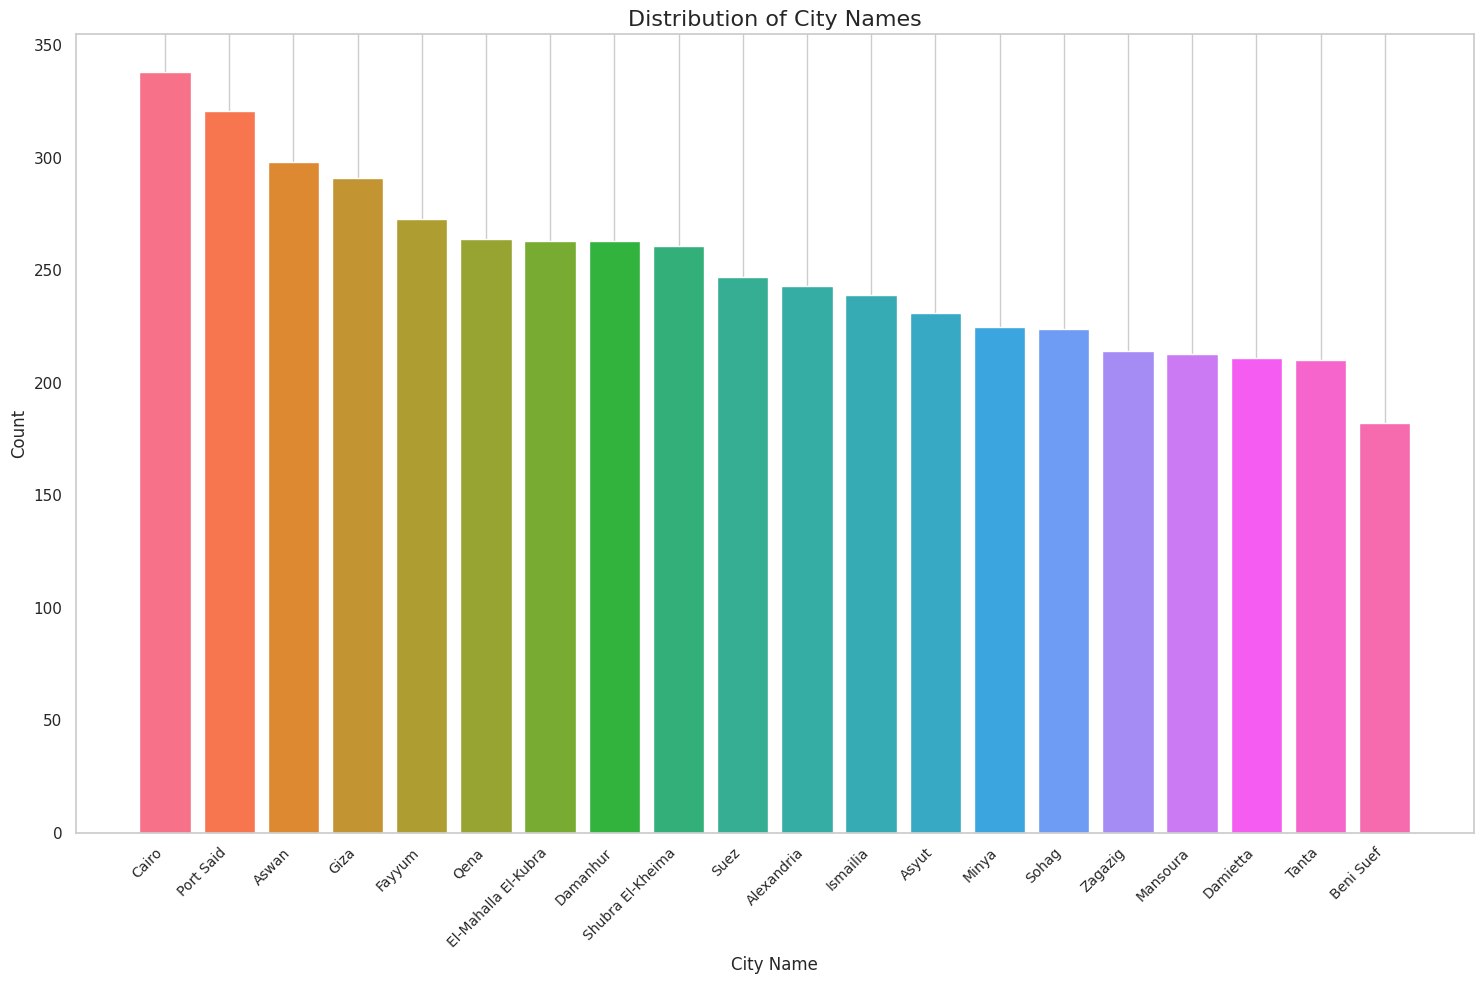

In [130]:
city_counts = merged_df['city_name'].value_counts()

# Define custom colors for the bars using a color palette from Seaborn
colors = sns.color_palette("husl", len(city_counts))

# Create a bar plot (histogram for categorical data)
plt.figure(figsize=(15, 10))
plt.bar(city_counts.index, city_counts.values, color=colors)

# Add labels and title
plt.xlabel('City Name', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Distribution of City Names', fontsize=16)

# Adjust x-axis labels with appropriate font size and angle to fit the city names
plt.xticks(ticks=city_counts.index, labels=city_counts.index, rotation=45, ha='right', fontsize=10)

# Display gridlines on the y-axis for better readability
plt.grid(axis='y')


plt.tight_layout()
plt.show()

In [131]:
merged_df['merchant_name'].value_counts()

merchant_name
Thomas-Nelson                     1032
Butler-Gomez                      1001
Smith, Lawson and Hernandez        527
Griffin-Leblanc                    496
Berry-Anderson                     496
Campbell, Shaffer and Martinez     489
Medina-Foster                      487
Lewis LLC                          472
Name: count, dtype: int64

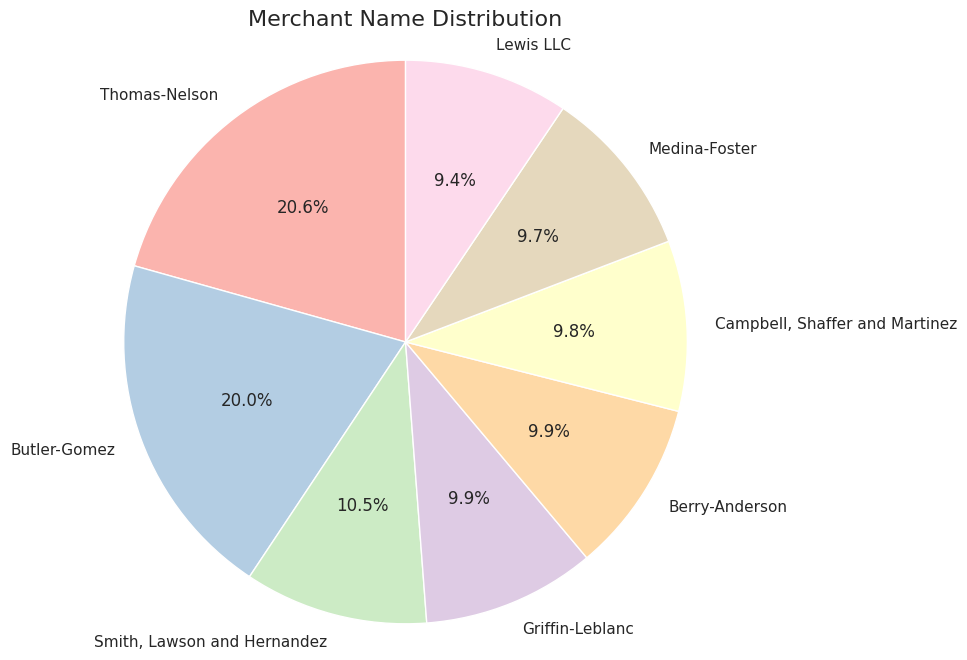

In [132]:
merchant_counts = merged_df['merchant_name'].value_counts()

plt.figure(figsize=(8, 8)) 
plt.pie(merchant_counts, labels=merchant_counts.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Pastel1.colors)

plt.title('Merchant Name Distribution', fontsize=16)


plt.axis('equal')

plt.show()

In [133]:
# Feature Engineering: Creating additional features for clustering
merged_df['transaction_count'] = merged_df.groupby('customer_id')['transaction_id'].transform('count')
merged_df['coupon_usage_count'] = merged_df.groupby('customer_id')['burn_date'].transform('count')
merged_df['days_since_last_transaction'] = (pd.Timestamp.now() - merged_df['transaction_date']).dt.days


In [134]:
# Selecting relevant features for clustering
features = merged_df[['gender_name', 'city_name', 'transaction_count', 'coupon_usage_count', 'days_since_last_transaction']]


In [135]:
features

,gender_name,city_name,transaction_count,coupon_usage_count,days_since_last_transaction
0,Male,Mansoura,7,3,783.0
1,Male,Mansoura,7,3,732.0
2,Male,Mansoura,7,3,834.0
3,Male,Mansoura,7,3,783.0
4,Male,Mansoura,7,3,546.0
...,...,...,...,...,...
5006,Male,Suez,4,4,491.0
5007,Male,Suez,4,4,639.0
5008,Male,Suez,4,4,164.0
5009,Female,Alexandria,2,1,153.0


In [136]:
features.isnull().sum()

gender_name                     0
city_name                       0
transaction_count               0
coupon_usage_count              0
days_since_last_transaction    11
dtype: int64

In [137]:
features=features.dropna()

In [138]:
features.isnull().sum().sum()

0

In [139]:
features.duplicated().sum()

116

In [142]:
features['gender_name'].value_counts()

gender_name
Male      2507
Female    2377
Name: count, dtype: int64

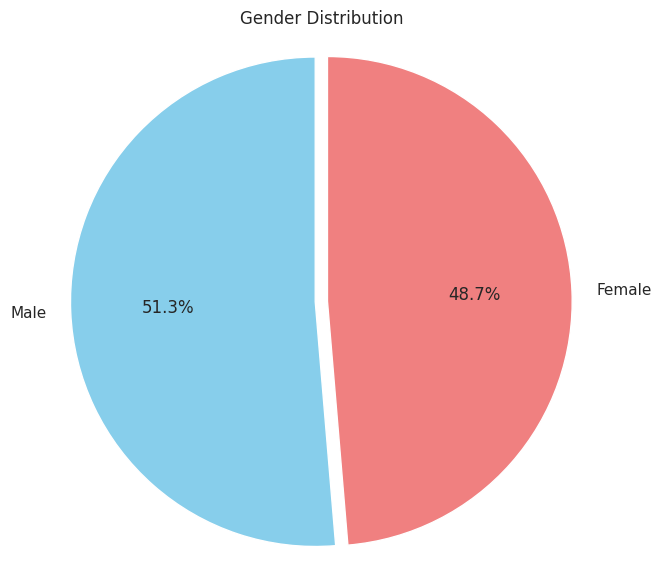

In [143]:
gender_counts = features['gender_name'].value_counts()
# Extract labels and sizes from value_counts()
labels = ['Male', 'Female']  # Assuming 1 = Male and 0 = Female
sizes = gender_counts.values

# Create the pie chart
plt.figure(figsize=(7, 7))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, 
        colors=['skyblue', 'lightcoral'], explode=(0.05, 0)) 
plt.title('Gender Distribution') 
plt.axis('equal') 
plt.show()


In [144]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Encoding categorical variables
label_encoder = LabelEncoder()
features['gender_name'] = label_encoder.fit_transform(features['gender_name'])
features['city_name'] = label_encoder.fit_transform(features['city_name'])


In [145]:
features

,gender_name,city_name,transaction_count,coupon_usage_count,days_since_last_transaction
0,1,11,7,3,783.0
1,1,11,7,3,732.0
2,1,11,7,3,834.0
4,1,11,7,3,546.0
5,1,11,7,3,949.0
...,...,...,...,...,...
5006,1,17,4,4,491.0
5007,1,17,4,4,639.0
5008,1,17,4,4,164.0
5009,0,0,2,1,153.0


In [146]:
features.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4884 entries, 0 to 5010
Data columns (total 5 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   gender_name                  4884 non-null   int64  
 1   city_name                    4884 non-null   int64  
 2   transaction_count            4884 non-null   int64  
 3   coupon_usage_count           4884 non-null   int64  
 4   days_since_last_transaction  4884 non-null   float64
dtypes: float64(1), int64(4)
memory usage: 228.9 KB


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


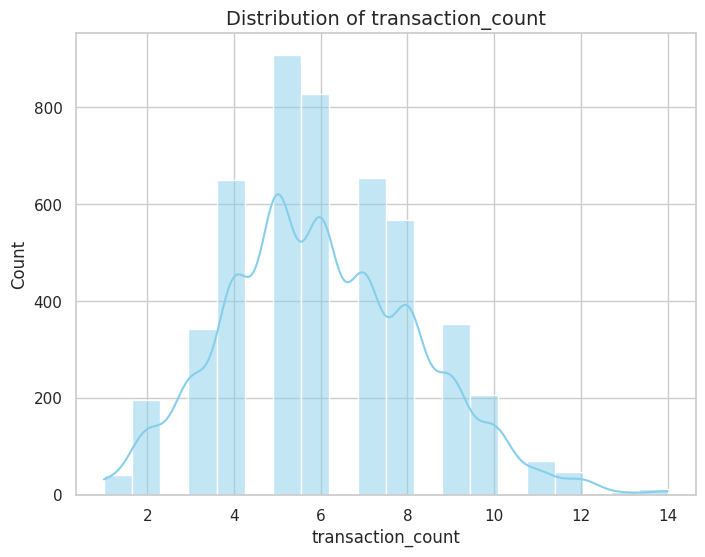

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


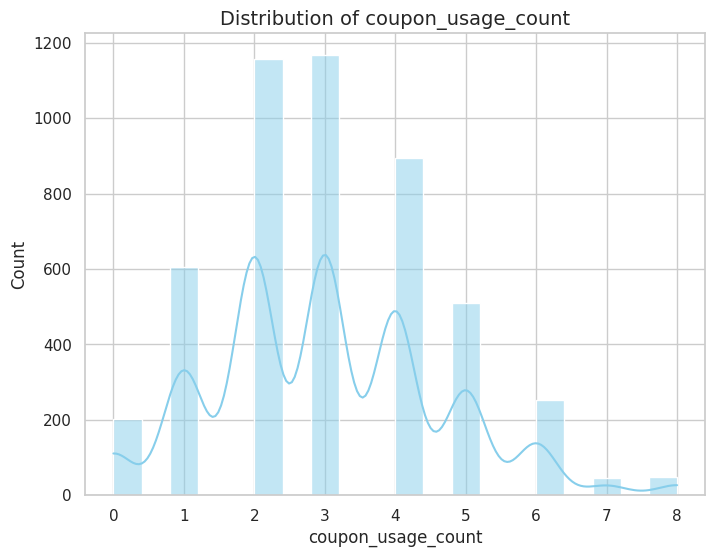

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


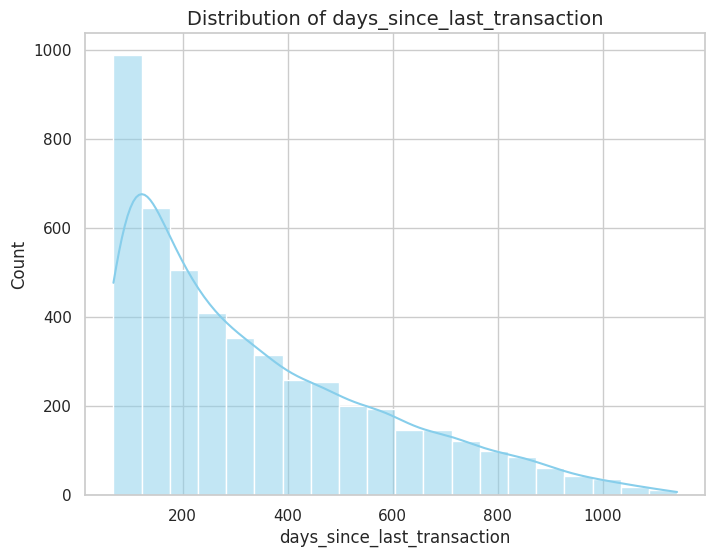

In [147]:
# Set the style for seaborn plots
sns.set(style="whitegrid")

# Histogram for numeric features
numeric_columns = ['transaction_count', 'coupon_usage_count', 'days_since_last_transaction']

for column in numeric_columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(features[column], kde=True, bins=20, color='skyblue')
    plt.title(f'Distribution of {column}', fontsize=14)
    plt.xlabel(column, fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.grid(True)
    plt.show()

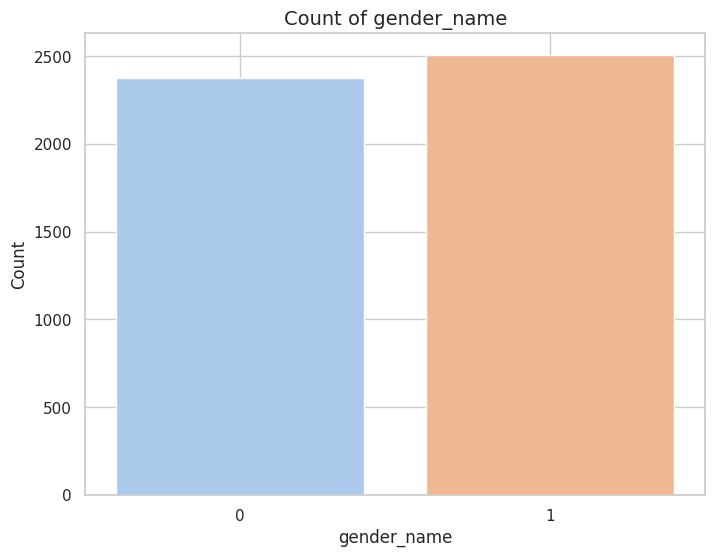

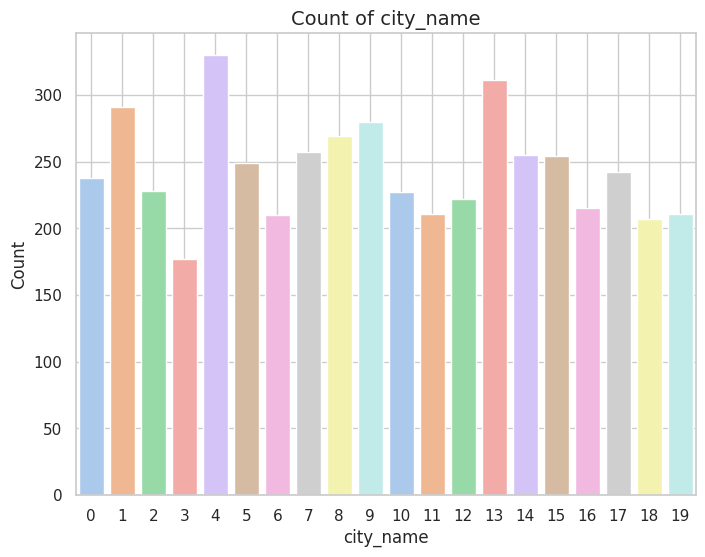

In [148]:
# Bar plot for 'gender_name' and 'city_name'
categorical_columns = ['gender_name', 'city_name']

for column in categorical_columns:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=features[column], palette='pastel')
    plt.title(f'Count of {column}', fontsize=14)
    plt.xlabel(column, fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.grid(True)
    plt.show()


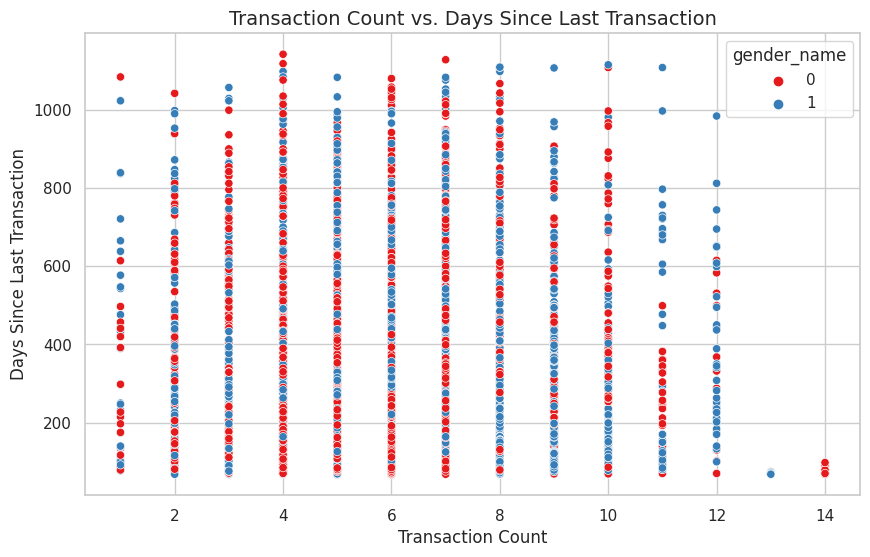

In [149]:
# Scatter plot to visualize relationships between features
plt.figure(figsize=(10, 6))
sns.scatterplot(x='transaction_count', y='days_since_last_transaction', hue='gender_name', data=features, palette='Set1')
plt.title('Transaction Count vs. Days Since Last Transaction', fontsize=14)
plt.xlabel('Transaction Count', fontsize=12)
plt.ylabel('Days Since Last Transaction', fontsize=12)
plt.grid(True)
plt.show()

# 3. Data Preprocessing:

In [151]:
# Scaling the numerical features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features[['transaction_count', 'coupon_usage_count', 'days_since_last_transaction']])


In [152]:
scaled_features

array([[ 0.42343751, -0.0159523 ,  1.85246716],
       [ 0.42343751, -0.0159523 ,  1.64001746],
       [ 0.42343751, -0.0159523 ,  2.06491686],
       ...,
       [-0.9102268 ,  0.60733615, -0.72608901],
       [-1.79933634, -1.26252921, -0.7719115 ],
       [-1.79933634, -1.26252921, -0.80107126]])

# 4. Model Training and Evaluation:


## 4.1 K-means

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:8

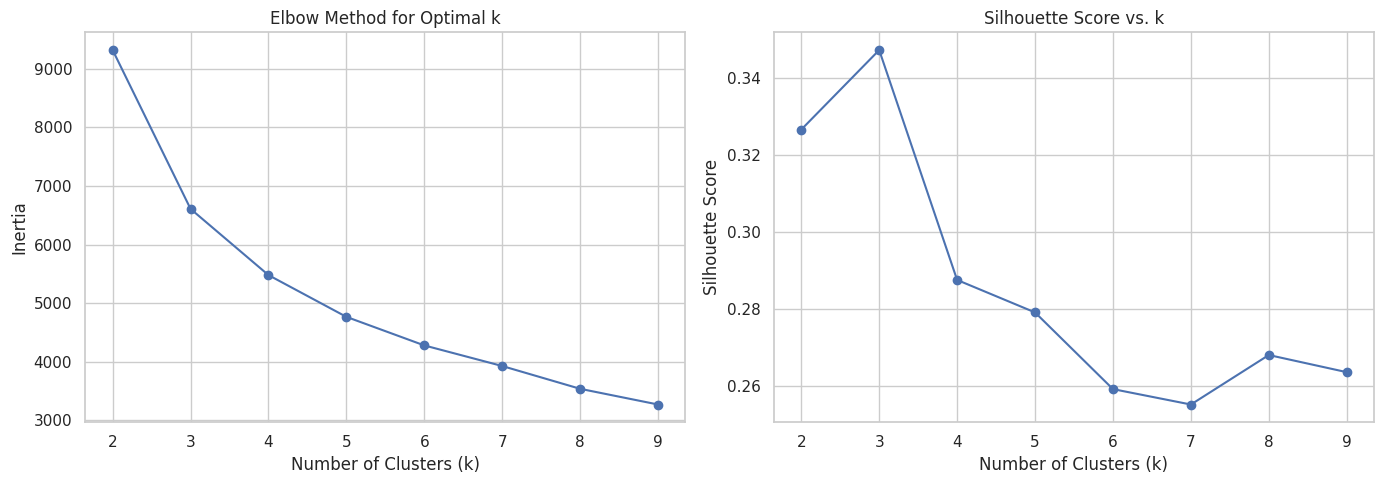

Best k based on Silhouette Score: 3
Best k based on Elbow Method (Inertia): 8


In [153]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Initialize lists to store inertia and silhouette scores
silhouette_scores = []
inertia_values = []
k_values = range(2, 10)

# Loop over different values of k
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    labels = kmeans.labels_
    
    # Append inertia (sum of squared distances) and silhouette score for each k
    inertia_values.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(scaled_features, labels))

# Plot Inertia (Elbow Method) and Silhouette Score
plt.figure(figsize=(14, 5))

# Elbow Method (Inertia plot)
plt.subplot(1, 2, 1)
plt.plot(k_values, inertia_values, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)

# Silhouette Score plot
plt.subplot(1, 2, 2)
plt.plot(k_values, silhouette_scores, marker='o')
plt.title('Silhouette Score vs. k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.grid(True)

plt.tight_layout()
plt.show()

# Find the best k by silhouette score (maximum value)
best_k_silhouette = k_values[np.argmax(silhouette_scores)]

# Find the "elbow" for the best k using inertia
# The elbow can be found by looking for the maximum second derivative (curvature)
inertia_diff = np.diff(inertia_values)
inertia_diff2 = np.diff(inertia_diff)
best_k_elbow = k_values[np.argmin(inertia_diff2) + 2]  # +2 to adjust the indexing

# Print the results
print(f"Best k based on Silhouette Score: {best_k_silhouette}")
print(f"Best k based on Elbow Method (Inertia): {best_k_elbow}")


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


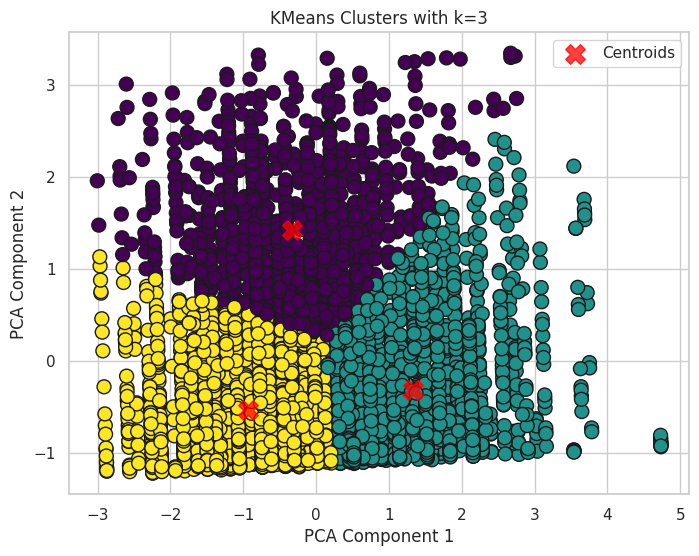

In [154]:
from sklearn.decomposition import PCA

optimal_k = 3

# Fit KMeans with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(scaled_features)
labels = kmeans.labels_

# Use PCA to reduce dimensions to 2D for visualization
pca = PCA(n_components=2)
pca_features = pca.fit_transform(scaled_features)

# Plotting the clusters
plt.figure(figsize=(8, 6))
plt.scatter(pca_features[:, 0], pca_features[:, 1], c=labels, cmap='viridis', marker='o', edgecolor='k', s=100)
plt.title(f'KMeans Clusters with k={optimal_k}')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')

# Mark cluster centers
centers = pca.transform(kmeans.cluster_centers_)
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, marker='X', label='Centroids')

plt.legend()
plt.show()


## 4.2 Hierarchical Clustering

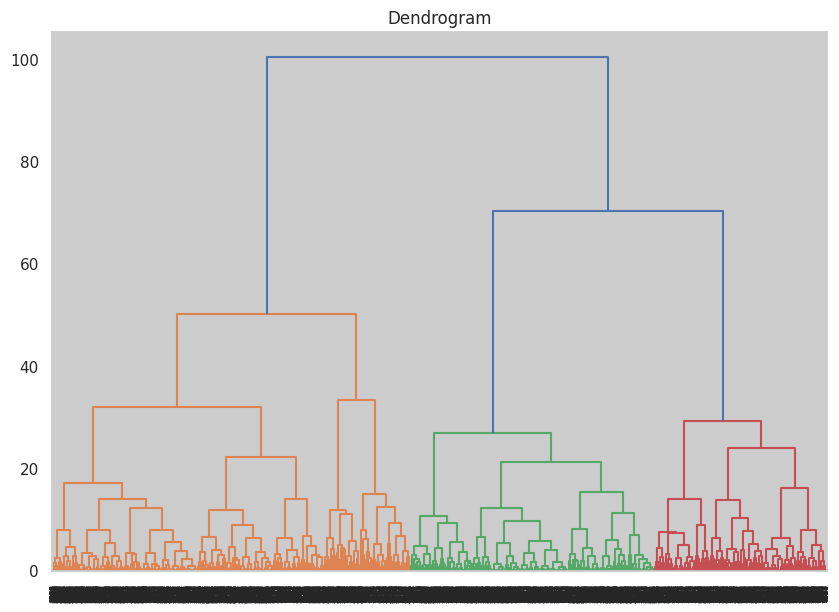

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Silhouette Score for Hierarchical Clustering: 0.3065

Cluster 0 Analysis:
       gender_name    city_name  transaction_count  coupon_usage_count  \
count  2260.000000  2260.000000        2260.000000         2260.000000   
mean      0.530531     9.173451           7.685398            4.280973   
std       0.499177     5.622238           1.777997            1.239847   
min       0.000000     0.000000           4.000000            2.000000   
25%       0.000000     4.000000           6.000000            3.000000   
50%       1.000000     9.000000           8.000000            4.000000   
75%       1.000000    14.000000           9.000000            5.000000   
max       1.000000    19.000000          14.000000            8.000000   

       days_since_last_transaction  hierarchical_cluster  dbscan_cluster  
count                  2260.000000                2260.0     2260.000000  
mean                    281.983628                   0.0        3.646460  
std                     194.274807

In [169]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt

# Step 1: Plot Dendrogram to visualize the clustering process
plt.figure(figsize=(10, 7))
plt.title("Dendrogram")
dendrogram = sch.dendrogram(sch.linkage(scaled_features, method='ward'))
plt.show()

# Step 2: Perform Agglomerative Hierarchical Clustering
hierarchical_clustering = AgglomerativeClustering(n_clusters=optimal_k, affinity='euclidean', linkage='ward')
labels = hierarchical_clustering.fit_predict(scaled_features)

# Step 3: Evaluate the clusters using silhouette score
silhouette_avg = silhouette_score(scaled_features, labels)
print(f'Silhouette Score for Hierarchical Clustering: {silhouette_avg:.4f}')

# Step 4: Add cluster labels to the features DataFrame
features['hierarchical_cluster'] = labels

# Step 5: Analyze each cluster (similar to what you did in K-means)
for cluster_num in range(optimal_k):
    cluster_data = features[features['hierarchical_cluster'] == cluster_num]
    print(f"\nCluster {cluster_num} Analysis:")
    print(cluster_data.describe())  # Statistical summary of the cluster


## 4.3 DBSCAN

In [156]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import numpy as np

# Step 1: Apply DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)  # Modify eps and min_samples based on your data
labels = dbscan.fit_predict(scaled_features)

# Step 2: Count the number of clusters (excluding noise points labeled as -1)
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = list(labels).count(-1)

print(f"Number of clusters found (excluding noise): {n_clusters}")
print(f"Number of noise points: {n_noise}")

# Step 3: Evaluate the clustering (excluding noise points with label -1)
if n_clusters > 1:  # Silhouette score is valid only if there are more than 1 cluster
    # Exclude noise points for silhouette score calculation
    non_noise_mask = labels != -1
    silhouette_avg = silhouette_score(scaled_features[non_noise_mask], labels[non_noise_mask])
    print(f'Silhouette Score for DBSCAN: {silhouette_avg:.4f}')
else:
    print("Silhouette Score is not valid as only 1 or no clusters were found.")

# Step 4: Add cluster labels to the DataFrame (optional)
features['dbscan_cluster'] = labels

# Step 5: Analyze each cluster (ignoring noise points)
for cluster_num in range(n_clusters):
    cluster_data = features[features['dbscan_cluster'] == cluster_num]
    print(f"\nCluster {cluster_num} Analysis:")
    print(cluster_data.describe())  # Statistical summary of the cluster


Number of clusters found (excluding noise): 16
Number of noise points: 38
Silhouette Score for DBSCAN: 0.0442

Cluster 0 Analysis:
       gender_name    city_name  transaction_count  coupon_usage_count  \
count  1165.000000  1165.000000        1165.000000              1165.0   
mean      0.426609     9.313305           5.903863                 3.0   
std       0.494797     5.624309           1.605733                 0.0   
min       0.000000     0.000000           3.000000                 3.0   
25%       0.000000     4.000000           5.000000                 3.0   
50%       0.000000     9.000000           6.000000                 3.0   
75%       1.000000    14.000000           7.000000                 3.0   
max       1.000000    19.000000          11.000000                 3.0   

       days_since_last_transaction  hierarchical_cluster  dbscan_cluster  
count                  1165.000000           1165.000000          1165.0  
mean                    364.853219              0.79

# 5.Segment Analysis and Recommendations

In [161]:
features

,gender_name,city_name,transaction_count,coupon_usage_count,days_since_last_transaction,hierarchical_cluster,dbscan_cluster
0,1,11,7,3,783.0,1,0
1,1,11,7,3,732.0,1,0
2,1,11,7,3,834.0,1,0
4,1,11,7,3,546.0,1,0
5,1,11,7,3,949.0,1,0
...,...,...,...,...,...,...,...
5006,1,17,4,4,491.0,1,3
5007,1,17,4,4,639.0,1,3
5008,1,17,4,4,164.0,0,3
5009,0,0,2,1,153.0,2,1


In [160]:
# Analyze each cluster
for cluster_num in range(optimal_k):
    cluster_data = features[features['hierarchical_cluster'] == cluster_num]
    print(f"\nCluster {cluster_num} Analysis:")
    print(cluster_data.describe())  # Statistical summary of the cluster

    # Custom analysis for behavioral metrics using the correct column names
    print("\nCustomer Behavior Summary:")
    print(f"Average Transaction Count: {cluster_data['transaction_count'].mean()}")
    print(f"Average Coupon Usage: {cluster_data['coupon_usage_count'].mean()}")
    print(f"Average Days Since Last Transaction: {cluster_data['days_since_last_transaction'].mean()}")

    # Generate insights for each cluster
    if cluster_num == 0:
        print("\nCluster 0: High-frequency, high-transaction customers with frequent coupon usage.")
        print("Recommendation: Offer loyalty discounts or exclusive high-value coupons.")
    elif cluster_num == 1:
        print("\nCluster 1: Low-frequency customers with smaller transactions and moderate coupon usage.")
        print("Recommendation: Provide time-limited offers or discounts to encourage more frequent transactions.")
    elif cluster_num == 2:
        print("\nCluster 2: Customers with fewer coupon usages and irregular shopping patterns.")
        print("Recommendation: Provide introductory or higher-value coupons to incentivize coupon usage and increase engagement.")


Cluster 0 Analysis:
       gender_name    city_name  transaction_count  coupon_usage_count  \
count  2260.000000  2260.000000        2260.000000         2260.000000   
mean      0.530531     9.173451           7.685398            4.280973   
std       0.499177     5.622238           1.777997            1.239847   
min       0.000000     0.000000           4.000000            2.000000   
25%       0.000000     4.000000           6.000000            3.000000   
50%       1.000000     9.000000           8.000000            4.000000   
75%       1.000000    14.000000           9.000000            5.000000   
max       1.000000    19.000000          14.000000            8.000000   

       days_since_last_transaction  hierarchical_cluster  dbscan_cluster  
count                  2260.000000                2260.0     2260.000000  
mean                    281.983628                   0.0        3.646460  
std                     194.274807                   0.0        2.852778  
min         

# Customer Behavior Summary:

## Cluster 0
* Average Transaction Count: 7.685398230088496
* Average Coupon Usage: 4.280973451327434
* Average Days Since Last Transaction: 281.98362831858407

## Cluster 1
* Average Transaction Count: 5.032228360957642
* Average Coupon Usage: 2.3213627992633517
* Average Days Since Last Transaction: 655.1629834254144

## Cluster 2
* Average Transaction Count: 4.357607282184655
* Average Coupon Usage: 1.6781534460338101
* Average Days Since Last Transaction: 197.32119635890768


# Recommendations:

## Cluster 0
* **High-frequency, high-transaction customers with frequent coupon usage.**
* **Offer loyalty discounts or exclusive high-value coupons.**

## Cluster 1
* **Low-frequency customers with smaller transactions and moderate coupon usage.**
* **Provide time-limited offers or discounts to encourage more frequent transactions.**

## Cluster 2
* **Customers with fewer coupon usages and irregular shopping patterns.**
* **Provide introductory or higher-value coupons to incentivize coupon usage and increase engagement.**


# 6.Cluster Visualization

## 6.1 Cluster Distribution (Bar Plot)

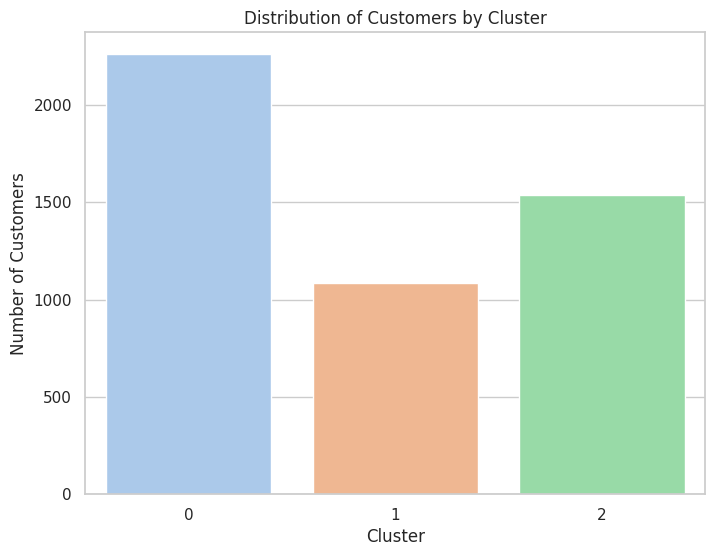

In [162]:
import matplotlib.pyplot as plt
import seaborn as sns

# Cluster distribution
cluster_counts = features['hierarchical_cluster'].value_counts()

# Bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=cluster_counts.index, y=cluster_counts.values, palette="pastel")
plt.xlabel('Cluster')
plt.ylabel('Number of Customers')
plt.title('Distribution of Customers by Cluster')
plt.show()

## 6.2 Average Metrics per Cluster (Bar Plot)

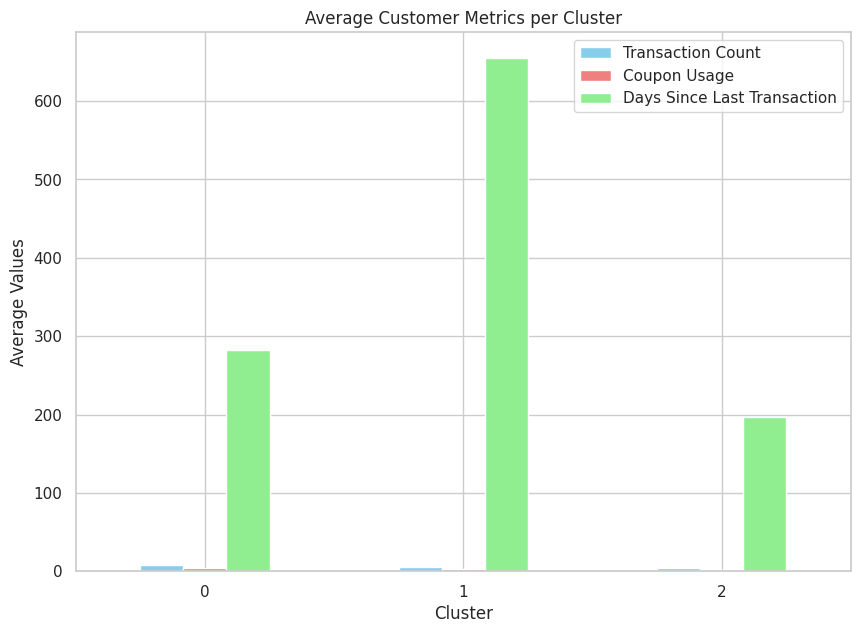

In [165]:
# Group by cluster and calculate the mean of the relevant columns
cluster_means = features.groupby('hierarchical_cluster')[['transaction_count', 'coupon_usage_count', 'days_since_last_transaction']].mean()

# Bar plot for average metrics per cluster
cluster_means.plot(kind='bar', figsize=(10, 7), color=['skyblue', 'lightcoral', 'lightgreen'])
plt.title('Average Customer Metrics per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Average Values')
plt.xticks(rotation=0)
plt.legend(['Transaction Count', 'Coupon Usage', 'Days Since Last Transaction'])
plt.show()

##  6.3 Gender Distribution by Cluster (Stacked Bar Chart)

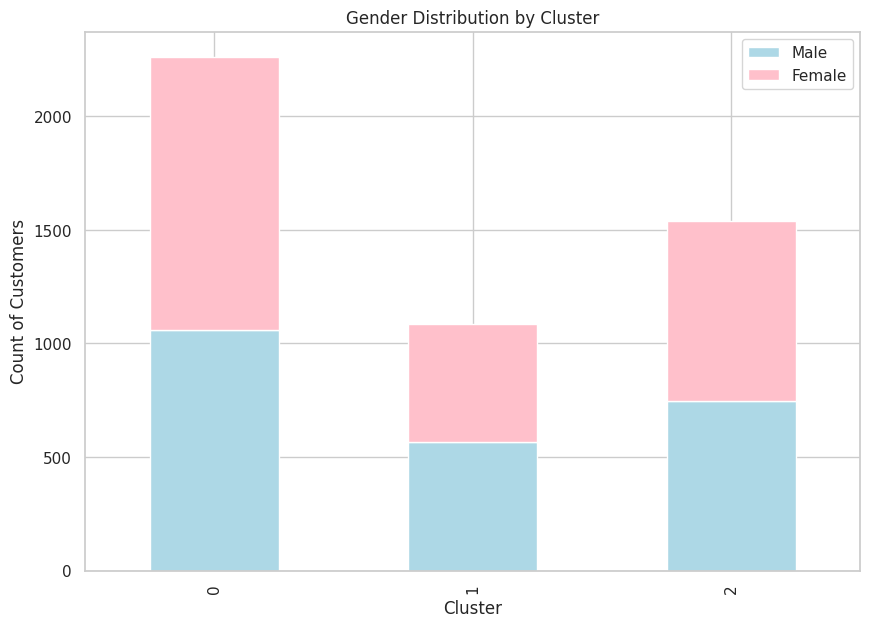

In [167]:
# Gender distribution by cluster
gender_cluster = features.groupby(['hierarchical_cluster', 'gender_name']).size().unstack()

# Stacked bar plot for gender distribution across clusters
gender_cluster.plot(kind='bar', stacked=True, figsize=(10, 7), color=['lightblue', 'pink'])
plt.title('Gender Distribution by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Count of Customers')
plt.legend(['Male', 'Female'])
plt.show()

## 6.4 Pair plot for clustering

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated a

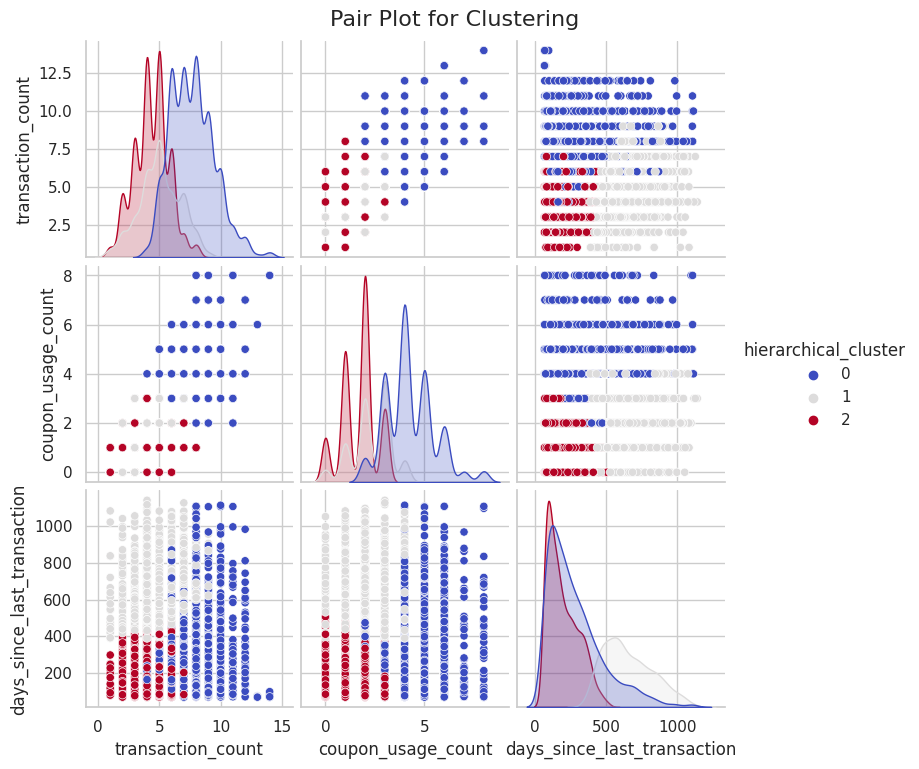

In [168]:
sns.pairplot(features, hue='hierarchical_cluster', vars=['transaction_count', 'coupon_usage_count', 'days_since_last_transaction'], palette='coolwarm', height=2.5)
plt.suptitle('Pair Plot for Clustering', y=1.02, fontsize=16)
plt.show()